In [5]:
#!/usr/bin/env python
# -*- coding: utf8 -*-
import sys
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from lxml import etree
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
XML_EXT = '.xml'
ENCODE_METHOD = 'utf-8'

NOTE_DIR = os.path.dirname(os.path.realpath('__file__'))
BASE_DIR = os.path.join(NOTE_DIR, '..')
DOC_DIR = os.path.join(BASE_DIR, 'doc')
LIB_DIR = os.path.join(BASE_DIR, 'lib')

VOC_DIR = os.path.join(DOC_DIR, 'converter\kitti_voc\kittivoc_trainval\Annotations')
OUTPUT_DIR = os.path.join(DOC_DIR, 'converter\output' )

VOC_DIR_NEW = os.path.join(DOC_DIR, 'converter_new\kitti_voc_ori\kittivoc_trainval\Annotations')
OUTPUT_DIR_NEW = os.path.join(DOC_DIR, 'converter_new\output' )

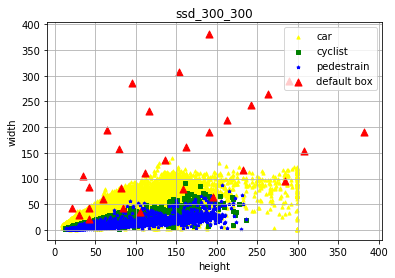

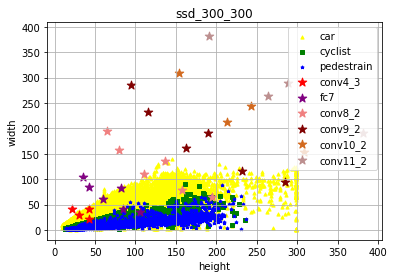

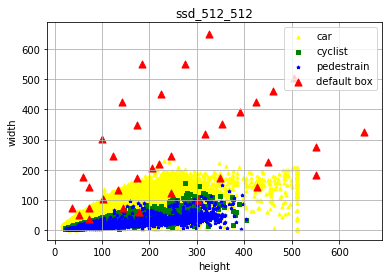

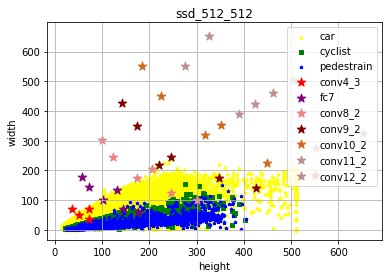

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

class plot_data:
    def __init__(self, car_txt, cyclist_txt, pedestrian_txt,anchor_txt, width, height):
        self.car_txt = car_txt
        self.cyclist_txt = cyclist_txt
        self.pedestrian_txt = pedestrian_txt
        self.anchor_txt = anchor_txt
        self.width = width
        self.height = height
        self._load_data()
    
    def _load_data(self):
        self.car_data = np.loadtxt(self.car_txt)
        self.cyclist_data = np.loadtxt(self.cyclist_txt)
        self.pedestrian_data = np.loadtxt(self.pedestrian_txt)
        self.anchor_data = np.loadtxt(self.anchor_txt)
        
    def _plot_data(self):
        plt.scatter(self.car_data[:,1], self.car_data[:,0], s=10, c="yellow",marker="^",label='car')
        plt.scatter(self.cyclist_data[:,1], self.cyclist_data[:,0], s=10, c="green", marker="s", label='cyclist')
        plt.scatter(self.pedestrian_data[:,1], self.pedestrian_data[:,0], s=10, c="blue", marker="*", label='pedestrain')
        plt.scatter(self.anchor_data[:,1], self.anchor_data[:,0], s=50, marker="^", c="red", label="default box")
        
        plt.xlabel('height')
        plt.ylabel('width')
        name_ = "ssd" + "_" + str(self.width)+ "_" + str(self.height)
        plt.title(name_)
        plt.legend()
        plt.grid()
        
        fig_name_ = "ssd_kitti_" + str(self.width) + "_" + str(self.height) + "_" + "default1.pdf"
        fig_path_ = os.path.join(os.path.dirname(self.car_txt),fig_name_)
        plt.savefig(fig_path_)
        plt.show()
    
    def _plot_data_level(self):
        plt.scatter(self.car_data[:,1], self.car_data[:,0], s=10, c="yellow",marker="^",label='car')
        plt.scatter(self.cyclist_data[:,1], self.cyclist_data[:,0], s=10, c="green", marker="s", label='cyclist')
        plt.scatter(self.pedestrian_data[:,1], self.pedestrian_data[:,0], s=10, c="blue", marker="*", label='pedestrain')
        
        if self.width == 300:
            plt.scatter(self.anchor_data[0:4,1], self.anchor_data[0:4,0], s=80, marker="*", c="red", label="conv4_3")
            plt.scatter(self.anchor_data[4:10,1], self.anchor_data[4:10,0], s=80, marker="*", c="purple", label="fc7")
            plt.scatter(self.anchor_data[10:16,1], self.anchor_data[10:16,0], s=80, marker="*", c="lightcoral", label="conv8_2")
            plt.scatter(self.anchor_data[16:22,1], self.anchor_data[16:22,0], s=80, marker="*", c="maroon", label="conv9_2")
            plt.scatter(self.anchor_data[22:26,1], self.anchor_data[22:26,0], s=80, marker="*", c="chocolate", label="conv10_2")
            plt.scatter(self.anchor_data[26:30,1], self.anchor_data[26:30,0], s=80, marker="*", c="rosybrown", label="conv11_2")
        else:
            plt.scatter(self.anchor_data[0:4,1], self.anchor_data[0:4,0], s=80, marker="*", c="red", label="conv4_3")
            plt.scatter(self.anchor_data[4:10,1], self.anchor_data[4:10,0], s=80, marker="*", c="purple", label="fc7")
            plt.scatter(self.anchor_data[10:16,1], self.anchor_data[10:16,0], s=80, marker="*", c="lightcoral", label="conv8_2")
            plt.scatter(self.anchor_data[16:22,1], self.anchor_data[16:22,0], s=80, marker="*", c="maroon", label="conv9_2")
            plt.scatter(self.anchor_data[22:28,1], self.anchor_data[22:28,0], s=80, marker="*", c="chocolate", label="conv10_2")
            plt.scatter(self.anchor_data[28:32,1], self.anchor_data[28:32,0], s=80, marker="*", c="rosybrown", label="conv11_2")
            plt.scatter(self.anchor_data[32:36,1], self.anchor_data[32:36,0], s=80, marker="*", c="rosybrown", label="conv12_2")
        
        plt.xlabel('height')
        plt.ylabel('width')
        name_ = "ssd" + "_" + str(self.width)+ "_" + str(self.height)
        plt.title(name_)
        plt.legend()
        plt.legend(loc = "upper right")
        plt.grid()
        
        fig_name_ = "ssd_kitti_" + str(self.width) + "_" + str(self.height) + "_" + "default_color.pdf"
        fig_path_ = os.path.join(os.path.dirname(self.car_txt),fig_name_)
        plt.savefig(fig_path_)
        plt.show()              

        
        
        
        
    
if __name__ == '__main__':
    plttxt = plot_data(os.path.join(OUTPUT_DIR,'Car_300_300.txt'),
                       os.path.join(OUTPUT_DIR,'Cyclist_300_300.txt'),
                       os.path.join(OUTPUT_DIR,'Pedestrian_300_300.txt'),
                       os.path.join(OUTPUT_DIR,'ssd300_anchor_data.txt'),
                       300,300)
    plttxt._plot_data()
    plttxt._plot_data_level()
    

    plttxt = plot_data(os.path.join(OUTPUT_DIR,'Car_512_512.txt'),
                       os.path.join(OUTPUT_DIR,'Cyclist_512_512.txt'),
                       os.path.join(OUTPUT_DIR,'Pedestrian_512_512.txt'),
                       os.path.join(OUTPUT_DIR,'ssd512_anchor_data.txt'),
                       512,512)
    plttxt._plot_data()
    plttxt._plot_data_level()